In [5]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Random Variables

Let $v$ be a random variable.

Expected value $E[v]$ is the mean:
* $E[v] = \bar{v} = \frac{1}{N}\sum_{1}^{N}v_i$

Expected value of a vector:
* $E[\mathbf{v}] = \mathbf{\bar{v}} = [\bar{x}_1,...,\bar{x}_n]^\top$

Variance is $E[(v-E[v])^2]$:
* $\sigma^2=E[(v-\bar{v})^2]=\frac{1}{N}\sum_{1}^{N}(v_i-\bar{v})^2$

Standard deviation is the square root of variance:
* $\sigma$

Covariance matrix is $E\big[ (\mathbf{x}-E[\mathbf{x}])(\mathbf{x}-E[\mathbf{x}])^{\top} \big]$, size $N \times N$:
* $R_{ij}=\frac{1}{N}\sum_{k=1}^{N}(x_{ik}-\bar{x}_i)(x_{jk}-\bar{x}_j)$
* $R = \mathbf{v} \mathbf{v}^{\top}$

In [6]:
t = np.linspace(0, 6, 2000)

noise_mean = 0
noise_std_1 = 90
v = np.column_stack(np.random.normal(noise_mean, noise_std_1, len(t))).T

In [7]:
N = scipy.stats.norm(noise_mean, noise_std_1)
xr = np.linspace(-300, 300, 1000)
pdf = N.pdf(xr)

# Histogram

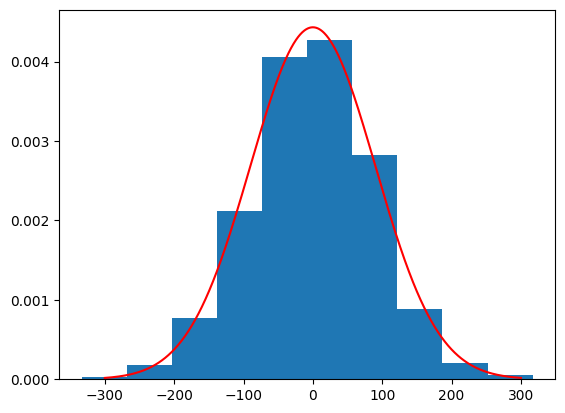

In [8]:
plt.hist(v, density=True)
plt.plot(xr, pdf, color='red')

# Covariance matrix

In [9]:
v = np.column_stack(np.random.normal(noise_mean, noise_std_1, 4)).T
print(v@v.T)

[[ 5429.56482564  -602.55044293 -1103.04198876  5258.65497524]
 [ -602.55044293    66.86853329   122.41099614  -583.58358107]
 [-1103.04198876   122.41099614   224.08824059 -1068.32083755]
 [ 5258.65497524  -583.58358107 -1068.32083755  5093.12496244]]


# Empirical convariance matrix

In [14]:
R = []

for i in range(1000):
    v = np.column_stack(np.random.normal(noise_mean, noise_std_1, 4)).T
    Ri = v@v.T
    R.append(Ri)

In [11]:
Rstack = np.dstack(R)

In [12]:
print( np.mean(Rstack, 2) )

[[8896.24413496  440.49202392  427.17170663 -208.8237597 ]
 [ 440.49202392 7830.29476643 -280.02247753 -144.06872357]
 [ 427.17170663 -280.02247753 8400.14974473 -525.02181105]
 [-208.8237597  -144.06872357 -525.02181105 8240.25642183]]


# Exercises

1. Print out the true covariance matrix. How does the empirical covariance matrix compare?
2. Increase the number of iterations (by a lot) in the empirical covariance matrix. How does it compare to the true covariance now?

In [13]:
print(Rstack)

[[[ 1.17221537e+04  3.65280998e+03  2.92732399e+03 ...  7.33251702e+03
    5.54113243e+02  5.74489770e+03]
  [ 1.22853488e+04 -7.01801277e+02  3.08386845e+02 ...  8.05658965e+03
    1.03201218e+03 -2.01410882e+03]
  [ 2.33921175e+03  2.84690588e+03 -7.03422114e+03 ...  5.45711665e+03
   -1.08710650e+03 -2.24707380e+03]
  [-1.78831957e+04 -8.55837045e+03 -4.06305362e+03 ...  4.25332404e+03
   -1.51538839e+02  3.13830124e+02]]

 [[ 1.22853488e+04 -7.01801277e+02  3.08386845e+02 ...  8.05658965e+03
    1.03201218e+03 -2.01410882e+03]
  [ 1.28756028e+04  1.34834562e+02  3.24878443e+01 ...  8.85216313e+03
    1.92207847e+03  7.06128212e+02]
  [ 2.45160001e+03 -5.46965813e+02 -7.41039008e+02 ...  5.99599693e+03
   -2.02468928e+03  7.87803612e+02]
  [-1.87424003e+04  1.64428901e+03 -4.28033348e+02 ...  4.67333200e+03
   -2.82234595e+02 -1.10025984e+02]]

 [[ 2.33921175e+03  2.84690588e+03 -7.03422114e+03 ...  5.45711665e+03
   -1.08710650e+03 -2.24707380e+03]
  [ 2.45160001e+03 -5.46965813e+0

In [16]:
R = []

for i in range(10000):
    v = np.column_stack(np.random.normal(noise_mean, noise_std_1, 4)).T
    Ri = v@v.T
    R.append(Ri)
###########################################

Rstack = np.dstack(R)
print( np.mean(Rstack, 2) )

[[ 8.01288712e+03 -4.82870957e+01  1.48021444e+01 -1.14184893e+02]
 [-4.82870957e+01  8.06574084e+03 -2.59927990e+00  3.60476011e+00]
 [ 1.48021444e+01 -2.59927990e+00  8.01563133e+03 -7.66460189e+01]
 [-1.14184893e+02  3.60476011e+00 -7.66460189e+01  8.11652017e+03]]


In [17]:
R = []

for i in range(100000):
    v = np.column_stack(np.random.normal(noise_mean, noise_std_1, 4)).T
    Ri = v@v.T
    R.append(Ri)
###########################################

Rstack = np.dstack(R)
print( np.mean(Rstack, 2) )

[[ 8.08856138e+03  4.32417602e+01 -1.18495413e+01 -5.89897425e+01]
 [ 4.32417602e+01  8.15859569e+03  1.54777860e+01  3.99101737e+01]
 [-1.18495413e+01  1.54777860e+01  8.07757625e+03 -3.46133115e+00]
 [-5.89897425e+01  3.99101737e+01 -3.46133115e+00  8.06261210e+03]]
